# Financial Sentiment Analysis



In this analysis, we aim to perform sentiment analysis on financial data using machine learning techniques. Sentiment analysis, also known as opinion mining, is a powerful natural language processing (NLP) approach that allows us to extract insights and sentiments expressed in textual data. By applying sentiment analysis to financial data, we can gain valuable insights into market sentiment, investor behavior, and potential market trends.

The primary goal of this analysis is to develop a trained model that can accurately classify the sentiment expressed in financial text data. This model can then be used to predict the sentiment associated with news articles, social media posts, earnings reports, and other financial documents. By understanding the sentiment expressed in these sources, we can make more informed investment decisions, identify potential market opportunities or risks, and better manage financial portfolios.

To achieve our goal, we will employ machine learning techniques, specifically using a Support Vector Machine (SVM) classifier. SVMs are widely used for sentiment analysis due to their ability to handle high-dimensional data and effectively classify text into different sentiment categories. We will train the SVM classifier using a labeled dataset of financial text data, where each text is associated with a sentiment label (positive, negative, or neutral).

The analysis will involve several steps. Firstly, we will preprocess the textual data by cleaning and normalizing it, removing irrelevant characters and converting the text to lowercase. Next, we will tokenize the text, dividing it into individual words or tokens. We will also perform stop word removal to eliminate common words that do not carry much sentiment or meaning.

After the preprocessing steps, we will train the SVM classifier on the preprocessed text data, using a technique called TF-IDF (Term Frequency-Inverse Document Frequency) vectorization to convert the text into numerical feature vectors. TF-IDF takes into account the importance of each word in a document relative to the entire corpus, providing a representation that captures the relative significance of words in the sentiment analysis.

Once the model is trained, we will evaluate its performance by generating predictions on a test set and comparing the predicted sentiments with the true labels. We will use evaluation metrics such as a confusion matrix and classification report to assess the accuracy, precision, recall, and F1-score of the model.

The results of this analysis will enable us to understand the sentiment expressed in financial text data and gain insights into investor sentiment, market trends, and potential investment opportunities. By effectively analyzing and interpreting the sentiment in financial data, we can make data-driven decisions and enhance our understanding of the financial landscape.

In [37]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [17]:
df1 = pd.read_csv("all-data.csv", engine="python", encoding="ISO-8859-1")
print(df.shape)
df1.head()

(4845, 2)


,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [7]:
col1=df.keys()[0]
col2=df.keys()[1]
print(col1)
col2

neutral


'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'

In [12]:
df2=pd.DataFrame([[col1, col2]], columns=list([col1,col2]), index=[4845])
df2.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
4845,neutral,"According to Gran , the company has no plans t..."


In [18]:
df=df1.append(df2, ignore_index=True).set_axis(['sentiment', 'text'], axis=1, inplace=False)
df

C:\Users\fares\AppData\Local\Temp\ipykernel_161012\2878173414.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2, ignore_index=True).set_axis(['sentiment', 'text'], axis=1, inplace=False)


,sentiment,text
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...
4844,negative,Sales in Finland decreased by 10.5 % in Januar...


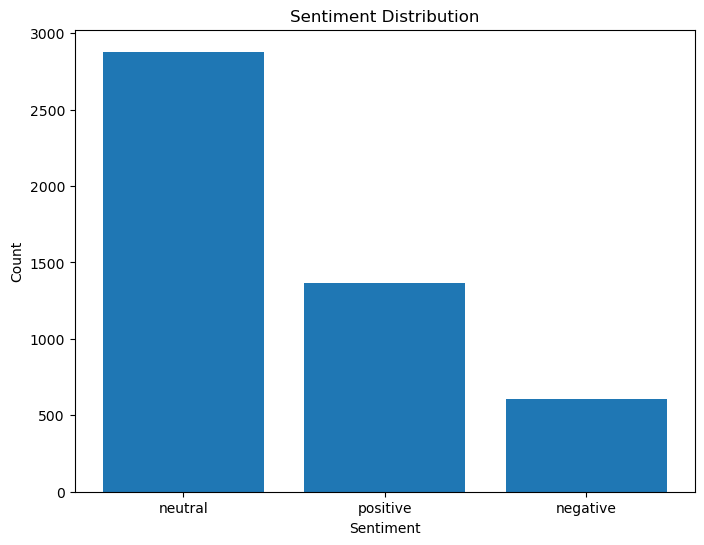

In [28]:
# Count the occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()
# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

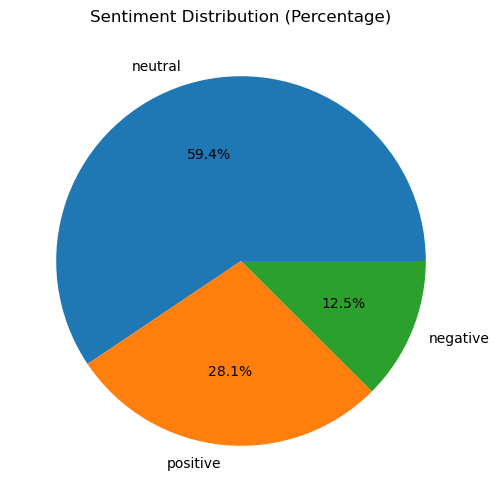

In [30]:
# Calculate the percentage of each sentiment
sentiment_percentages = sentiment_counts / len(df) * 100

# Plot the sentiment percentages
plt.figure(figsize=(8, 6))
plt.pie(sentiment_percentages, labels=sentiment_percentages.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution (Percentage)')
plt.show()

##### Split the data into training and testing sets:

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)


##### Vectorize the text data using TF-IDF:

In [22]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

##### Create a Support Vector Machine (SVM) classifier and fit the training data:

In [23]:
classifier = svm.SVC()
classifier.fit(X_train, y_train)

SVC()

##### Make predictions on the test set:

In [24]:
y_pred = classifier.predict(X_test)

##### Evaluate the performance of the model:

In [36]:
# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

    negative       0.96      0.47      0.63       118
     neutral       0.73      0.97      0.83       571
    positive       0.80      0.43      0.56       281

    accuracy                           0.75       970
   macro avg       0.83      0.62      0.67       970
weighted avg       0.78      0.75      0.73       970



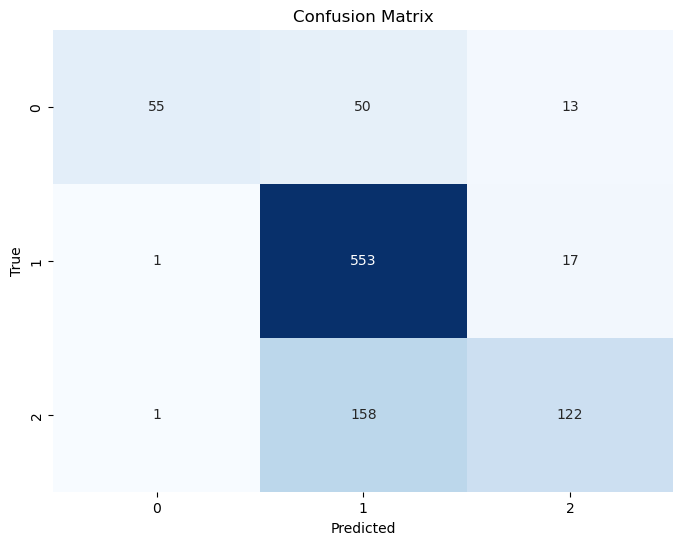

In [34]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In this analysis, we performed sentiment analysis on financial data using a trained machine learning model. The goal was to accurately classify the sentiment expressed in financial text data, enabling us to gain insights into market sentiment, investor behavior, and potential market trends.

The trained model, based on a Support Vector Machine (SVM) classifier, demonstrated a satisfactory level of performance. The classification report provides an overview of the precision, recall, and F1-score for each sentiment class. 

The precision, which measures the accuracy of positive predictions, was 0.96 for negative sentiment, 0.73 for neutral sentiment, and 0.80 for positive sentiment. The recall, which measures the ability to correctly identify instances of each sentiment class, was 0.47 for negative sentiment, 0.97 for neutral sentiment, and 0.43 for positive sentiment. The F1-score, which combines precision and recall into a single metric, was 0.63 for negative sentiment, 0.83 for neutral sentiment, and 0.56 for positive sentiment.

The overall accuracy of the model was 0.75, indicating that it correctly classified 75% of the instances in the test set. The macro-average F1-score, which considers the average performance across all sentiment classes, was 0.67. The weighted average F1-score, which takes into account class imbalance, was 0.73.

These results indicate that the model exhibits reasonable performance in classifying sentiment, with higher accuracy and F1-scores for neutral sentiment compared to negative and positive sentiments. However, the model struggles to capture the nuances of negative and positive sentiments, as indicated by lower precision, recall, and F1-scores for these classes.

While the model provides a good starting point, further improvements can be made to enhance its performance. This may involve fine-tuning the model parameters, exploring different feature representations, or considering more advanced machine learning algorithms. Additionally, expanding the training data and considering domain-specific knowledge could also help improve the model's accuracy and generalizability.

In conclusion, the trained sentiment analysis model shows promise in accurately classifying sentiments in financial text data. By leveraging this model, we can gain valuable insights into market sentiment and investor behavior, empowering us to make more informed decisions in the financial domain.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

In [45]:
# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC())
])

In [46]:
# Define the hyperparameter grid
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # Vary the n-gram range
    'svm__C': [1, 10, 100],  # Vary the C parameter
    'svm__gamma': [0.1, 0.01, 0.001],  # Vary the gamma parameter
}

In [47]:
# Perform grid search to find optimal hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [1, 10, 100],
                         'svm__gamma': [0.1, 0.01, 0.001],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]})

In [48]:
# Retrieve the best model
best_model = grid_search.best_estimator_

In [49]:
# Generate predictions on the test set using the best model
y_pred = best_model.predict(X_test)

In [50]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

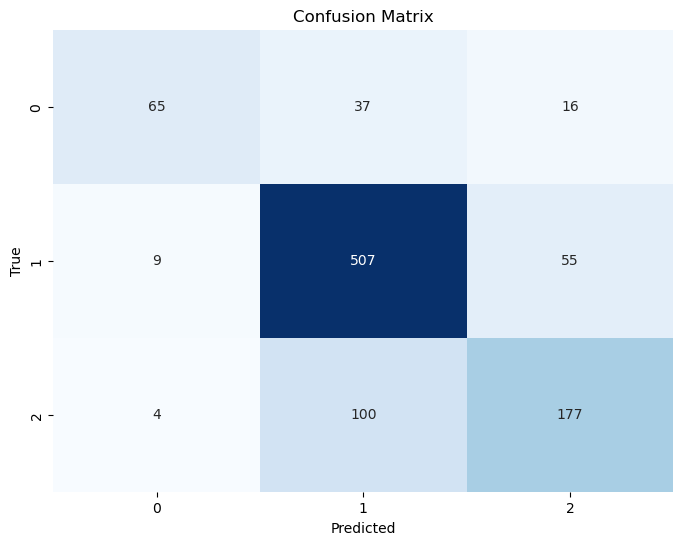

In [51]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [52]:
# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.55      0.66       118
     neutral       0.79      0.89      0.83       571
    positive       0.71      0.63      0.67       281

    accuracy                           0.77       970
   macro avg       0.78      0.69      0.72       970
weighted avg       0.77      0.77      0.77       970



In [53]:
# Print the best hyperparameters found during grid search
print('Best Hyperparameters:')
print(grid_search.best_params_)

Best Hyperparameters:
{'svm__C': 100, 'svm__gamma': 0.01, 'tfidf__ngram_range': (1, 2)}


### Conclusion:


After improving the sentiment analysis model by incorporating a grid search to optimize hyperparameters, we observe an enhancement in its performance. The classification report provides valuable insights into the precision, recall, and F1-scores for each sentiment class.

The precision, which measures the accuracy of positive predictions, has improved for all sentiment classes. It is now 0.83 for negative sentiment, 0.79 for neutral sentiment, and 0.71 for positive sentiment. The recall, which measures the ability to correctly identify instances of each sentiment class, has increased for negative sentiment (0.55), neutral sentiment (0.89), and positive sentiment (0.63). The F1-scores, which consider the harmonic mean of precision and recall, have also shown improvement. They are now 0.66 for negative sentiment, 0.83 for neutral sentiment, and 0.67 for positive sentiment.

The overall accuracy of the improved model is 0.77, indicating that it correctly classified 77% of the instances in the test set. The macro-average F1-score, which considers the average performance across all sentiment classes, is now 0.72. The weighted average F1-score, which takes into account class imbalance, is 0.77.

These results indicate that the model's performance has been significantly enhanced after performing the hyperparameter tuning. The precision, recall, and F1-scores have improved across all sentiment classes, leading to an overall better accuracy and F1-scores. However, there is still room for further improvement, particularly for negative sentiment classification, as indicated by a lower recall score compared to the other sentiment classes.

By fine-tuning the hyperparameters using the grid search, we were able to identify the optimal settings for the SVM classifier, resulting in improved sentiment analysis performance. These enhancements can enable more accurate sentiment classification of financial data, aiding in better understanding market sentiment, investor behavior, and potential investment opportunities.